# Нейронные сети с Keras
Keras -- простая библиотека для написания нейронных сетей. Keras не позволяет строить сложные модели со специфическими функциями потерь, но зато удобен в использовании. Синтаксис Keras напоминает синтаксис sklearn.

In [1]:
import numpy as np
import keras, keras.layers as L

/Users/anastasiazuhba/anaconda3/envs/Py3ML/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Введение
Основной класс для работы с керасом -- модель Sequential. В модель можно последовательно добавлять слои нейронной сети. 

После добавления всех слоёв можно вызвать model.compile, указав в аргументах функцию потерь, оптимизатор и метрику, которую необходимо считать при оптиимзации.

Функция .summary выводит информацию о нейронной сети.

In [2]:
model = keras.models.Sequential()
model.add(L.InputLayer(input_shape=[64]))
model.add(L.Dense(100, activation='relu'))
model.add(L.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 7,510
Trainable params: 7,510
Non-trainable params: 0
_________________________________________________________________


Обучим модель на датасете digits. 

0

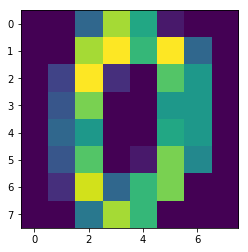

In [4]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline
X, y = load_digits(return_X_y=True)
plt.imshow(X[0].reshape((8,8)))
y[0]

In [5]:
X.shape

(1797, 64)

In [6]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

model.fit(X, y, epochs=1)

y_pred = model.predict_classes(X)
y_proba = model.predict_proba(X)

from sklearn.metrics import accuracy_score
print("\nAccuracy = %.3f" % accuracy_score(y, y_pred))

Epoch 1/1
1797/1797 [==============================] - 0s 153us/step - loss: 3.0807 - acc: 0.4630

Accuracy = 0.814


### Обобщающая способность нейронной сети
Визуализируем предсказания нейронной сети на простой задаче восстановления одномерной зависимости. 

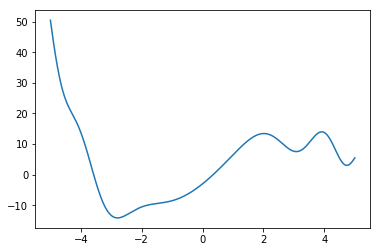

In [15]:
X = np.linspace(-5, 5, 1000)
y = 0.05 * X ** 4 - 0.5 * X ** 3 + 8 * X - 3 + 4 * np.sin(X**2 / 2)
plt.plot(X,y)

Подберём нейронную сеть, хорошо приближающую нашу функцию.

In [29]:
model = keras.models.Sequential()
model.add(L.InputLayer([1]))
model.add(L.Dense(50, activation='relu'))
model.add(L.Dense(50, activation='sigmoid'))
model.add(L.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [30]:
model.fit(X,y, epochs=300)

Epoch 1/300
1000/1000 [==============================] - 0s - loss: 160.6380     
Epoch 2/300
1000/1000 [==============================] - 0s - loss: 149.8788     
Epoch 3/300
1000/1000 [==============================] - 0s - loss: 142.3634     
Epoch 4/300
1000/1000 [==============================] - 0s - loss: 136.9694     
Epoch 5/300
1000/1000 [==============================] - 0s - loss: 132.8889     
Epoch 6/300
1000/1000 [==============================] - 0s - loss: 129.3500     
Epoch 7/300
1000/1000 [==============================] - 0s - loss: 125.8890     
Epoch 8/300
1000/1000 [==============================] - 0s - loss: 122.3866     
Epoch 9/300
1000/1000 [==============================] - 0s - loss: 118.5015     
Epoch 10/300
1000/1000 [==============================] - 0s - loss: 114.2828     
Epoch 11/300
1000/1000 [==============================] - 0s - loss: 109.6667     
Epoch 12/300
1000/1000 [==============================] - 0s - loss: 104.6259     
Epoch 13/300


1000/1000 [==============================] - 0s - loss: 8.3575     
Epoch 102/300
1000/1000 [==============================] - 0s - loss: 8.2603     
Epoch 103/300
1000/1000 [==============================] - 0s - loss: 8.1089     
Epoch 104/300
1000/1000 [==============================] - 0s - loss: 8.0222     
Epoch 105/300
1000/1000 [==============================] - 0s - loss: 7.9509     
Epoch 106/300
1000/1000 [==============================] - 0s - loss: 7.8295     
Epoch 107/300
1000/1000 [==============================] - 0s - loss: 7.7229     
Epoch 108/300
1000/1000 [==============================] - 0s - loss: 7.6295     
Epoch 109/300
1000/1000 [==============================] - 0s - loss: 7.5305     
Epoch 110/300
1000/1000 [==============================] - 0s - loss: 7.4873     
Epoch 111/300
1000/1000 [==============================] - 0s - loss: 7.3674     
Epoch 112/300
1000/1000 [==============================] - 0s - loss: 7.3005     
Epoch 113/300
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 3.6654     
Epoch 202/300
1000/1000 [==============================] - 0s - loss: 3.6207     
Epoch 203/300
1000/1000 [==============================] - 0s - loss: 3.5955     
Epoch 204/300
1000/1000 [==============================] - 0s - loss: 3.5914     
Epoch 205/300
1000/1000 [==============================] - 0s - loss: 3.5488     
Epoch 206/300
1000/1000 [==============================] - 0s - loss: 3.5322     
Epoch 207/300
1000/1000 [==============================] - 0s - loss: 3.5073     
Epoch 208/300
1000/1000 [==============================] - 0s - loss: 3.4821     
Epoch 209/300
1000/1000 [==============================] - 0s - loss: 3.5102     
Epoch 210/300
1000/1000 [==============================] - 0s - loss: 3.4691     
Epoch 211/300
1000/1000 [==============================] - 0s - loss: 3.4621     
Epoch 212/300
1000/1000 [==============================] - 0s - loss: 3.4472     
Epoch 213/300
1000/1000 [=====

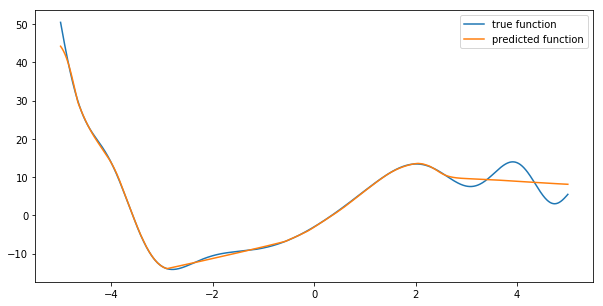

In [31]:
plt.figure(figsize=(10,5))
plt.plot(X,y, label='true function')
plt.plot(X, model.predict(X), label='predicted function')
plt.legend()
plt.show()

Построим на Keras более сложную модель. Это можно сделать так: создать слои, применять слои к предыдущим слоям, затем явно указать входы и выходы модели. Например:

In [39]:
l_inp = L.Input([64])

l_dense1 = L.Dense(50, activation='sigmoid')(l_inp)
l_dense2 = L.Dense(100, activation='relu')(l_inp)

l_concat = L.Concatenate()([l_dense1, l_dense2])
l_pre_output = L.Dense(10)(l_concat)
l_out = L.Activation('softmax')(l_pre_output)

model = keras.models.Model(inputs=[l_inp], outputs=[l_out])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [45]:
model.fit(X, y, epochs=10)
y_proba = model.predict(X)

from sklearn.metrics import accuracy_score
print("\nAccuracy = %.3f" % accuracy_score(y, np.argmax(y_proba, axis=1)))

Epoch 1/10
1797/1797 [==============================] - 0s - loss: 0.0223     
Epoch 2/10
1797/1797 [==============================] - 0s - loss: 0.0187     
Epoch 3/10
1797/1797 [==============================] - 0s - loss: 0.0167     
Epoch 4/10
1797/1797 [==============================] - 0s - loss: 0.0126     
Epoch 5/10
1797/1797 [==============================] - 0s - loss: 0.0120     
Epoch 6/10
1797/1797 [==============================] - 0s - loss: 0.0122     
Epoch 7/10
1797/1797 [==============================] - 0s - loss: 0.0089     
Epoch 8/10
1797/1797 [==============================] - 0s - loss: 0.0083     
Epoch 9/10
1797/1797 [==============================] - 0s - loss: 0.0071     
Epoch 10/10
1797/1797 [==============================] - 0s - loss: 0.0069     

Accuracy = 1.000


### Обучение нейронной сети на примере датасета cifar10

In [13]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

class_names = np.array(['airplane','automobile ','bird ','cat ','deer ','dog ','frog ','horse ','ship ','truck'])

print (X_train.shape,y_train.shape)

170500096/170498071 [==============================] - 98s 1us/step
(40000, 32, 32, 3) (40000, 1)


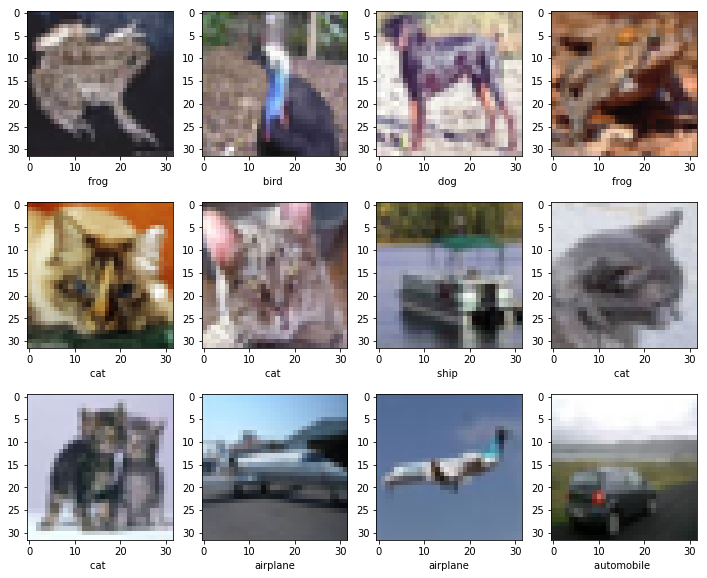

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[12,10])
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.xlabel(class_names[y_train[i, 0]])
    plt.imshow(X_train[i])

Нормировка:

In [15]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [16]:
model = keras.models.Sequential()

model.add(L.InputLayer(input_shape=[32,32,3]))
model.add(L.Flatten())
model.add(L.Dense(300, activation='relu'))
model.add(L.Dense(100, activation='relu'))
model.add(L.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [17]:
model.fit(X_train, y_train, epochs=7, validation_data=[X_val, y_val])

Train on 40000 samples, validate on 10000 samples
Epoch 1/7
40000/40000 [==============================] - 26s 653us/step - loss: 1.9024 - val_loss: 1.8244
Epoch 2/7
40000/40000 [==============================] - 25s 615us/step - loss: 1.7135 - val_loss: 1.7127
Epoch 3/7
40000/40000 [==============================] - 25s 627us/step - loss: 1.6368 - val_loss: 1.6665
Epoch 4/7
40000/40000 [==============================] - 24s 589us/step - loss: 1.5823 - val_loss: 1.5879
Epoch 5/7
40000/40000 [==============================] - 24s 592us/step - loss: 1.5411 - val_loss: 1.5588
Epoch 6/7
40000/40000 [==============================] - 24s 597us/step - loss: 1.5087 - val_loss: 1.5937
Epoch 7/7
40000/40000 [==============================] - 25s 616us/step - loss: 1.4855 - val_loss: 1.5855


In [18]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, model.predict_classes(X_test))
print("\n Test_acc =", test_acc)
assert test_acc > 0.45, "Not good enough. Back to the drawing board :)"
print(" Not bad!")


 Test_acc = 0.4451


AssertionError: Not good enough. Back to the drawing board :)

### Улучшаем модель
Составьте и обучите модель, состоящую из следующих слоёв:

- Входной слой
- Свёртка 3x3 с 10 фильтрами
- Нелинейность на ваш вкус
- Max-pooling 2x2
- Вытягиваем оставшееся в вектор (Flatten)
- Полносвязный слой на 100 нейронов
- Нелинейность на ваш вкус
- Выходной полносвязный слой с softmax

In [29]:
model = keras.models.Sequential()

model.add(L.InputLayer(input_shape=[32,32,3]))
model.add(L.Conv2D(filters=10, kernel_size=(3,3)))
model.add(L.Activation('relu'))
model.add(L.MaxPooling2D())
model.add(L.Flatten())
model.add(L.Dense(100, activation='relu'))
model.add(L.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [30]:
model.fit(X_train, y_train, epochs=5, validation_data=[X_val, y_val])

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 28s 690us/step - loss: 1.5220 - acc: 0.4537 - val_loss: 1.3209 - val_acc: 0.5327
Epoch 2/5
40000/40000 [==============================] - 23s 583us/step - loss: 1.2530 - acc: 0.5529 - val_loss: 1.2399 - val_acc: 0.5573
Epoch 3/5
40000/40000 [==============================] - 23s 585us/step - loss: 1.1448 - acc: 0.5957 - val_loss: 1.1795 - val_acc: 0.5880
Epoch 4/5
40000/40000 [==============================] - 26s 639us/step - loss: 1.0644 - acc: 0.6240 - val_loss: 1.1345 - val_acc: 0.6029
Epoch 5/5
40000/40000 [==============================] - 29s 715us/step - loss: 0.9877 - acc: 0.6525 - val_loss: 1.1335 - val_acc: 0.5996


In [31]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, model.predict_classes(X_test))
print("\n Test_acc =", test_acc)
assert test_acc > 0.50, "Not good enough. Back to the drawing board :)"
print(" Not bad!")


 Test_acc = 0.5958
 Not bad!
